   # Материалы:

   * Ссылка на презентацию: https://docs.google.com/presentation/d/1KmET8IqJ-oUAbyb5G3d9FcH27uXBy4fWzwnYqFkNXQA/edit?usp=sharing

   * Ссылка на дашборд: https://public.tableau.com/app/profile/leonid.kochkarov/viz/Final_dashbord_16951196808470/Dashboard1?publish=yes


# Анализа оттока клиентов «Метанпромбанка»
В моем распоряжении данные регионального банка "Метанпром", банк распологается в Ярославле и областных городах Ростов Великий и Рыбинск. Оснавная задача проанализоровать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить. Это позволит дать рекоментации по удержанию старых клиентов, так как это дешевле, чем привлекать новых.


<b>Задачи исселедования:</b>

    1. Определение сегмента клиентов склонных к уходу из банка.
    2. Дать рекомендации по работе с данной группой клиентов.
    
<b>Ход исследования:</b>

    Данные о клиентах я получу из файла '/datasets/bank_scrooge.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки поищу возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата и при необходимости сменю тип данных в столбцах. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа. После выберу метод стат. оценки и проверю 2 гипотезы. На остовании наблюдений и результатов предложу рекомендации.
    
    Таким образом, моё исследование пройдет в пять этапов:
   # Содержание: <a class="anchor" id="содержание"></a>
   # [Шаг 1. Загрузка и обзор данных.](#info)
   # [Шаг 2. Предобработка данных:](#prepare)
   #### [Шаг 2.1 Обзор и обработка дубликатов.](#prep1)
   #### [Шаг 2.2 Обзор и обработка аномалий.](#prep2)
   #### [Шаг 2.3 Работа с пропусками.](#prep3)
   #### [Шаг 2.4 Изменение типов данных.](#prep4)
   #### [Шаг 2.5 Подведение промежуточных итогов.](#prep5)
   # [Шаг 3. Исследовательский анализ:](#eda)
   #### [Шаг 3.1 Анализ распределения признаков в разрезе оттока клиентов.](#eda1)
   #### [Шаг 3.2 Анализ корреляции признаков между собой.](#eda2)
   #### [Шаг 3.3 Анализ типичных портретов клиентов в разрезе оттока.](#eda3)
   #### [Шаг 3.4 Сегментация клиентов по признакам отточности.](#eda4)
   #### [Шаг 3.5 Приоритизация сегментов.](#eda5)
   #### [Шаг 3.6 Подведение промежуточных итогов.](#eda6)
   # [Шаг 4. Статистический анализ:](#stata)
   #### [Шаг 4.1 Статистическая гипотеза 1 (различия дохода между теми клиентами, которые ушли и теми, которые остались).](#stata1)  
   #### [Шаг 4.2 Статистическая гипотеза 2 (собственная гипотеза).](#stata2)
   #### [Шаг 4.3 Подведение промежуточных итогов.](#stata3)       
   # [Шаг 5. Выводы и рекомендации.](#results)
    
    
## Описание данных:

`USERID` — идентификатор пользователя,;

`score` — баллы кредитного скоринга;

`city` — город;

`gender` — пол;

`age` — возраст;

`equity` — количество баллов собственности;

`balance` — баланс на счёте;

`products` — количество продуктов, которыми пользуется клиент;

`credit_card` — есть ли кредитная карта;

`last_activity` — активный клиент;

`EST_SALARY` — оценочный доход клиента;

`сhurn` — признак оттока.

# Шаг 1. Загрузка и обзор данных. <a class="anchor" id="info"></a>

In [1]:
# импорт библиотек
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
# чтение файла с данными и сохранение в переменные
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
data.head(15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
print('Кол-во пропусков в столбце возраст:', len(data[data['age'].isna()]))
print('Кол-во пропусков в столбце баланса:', len(data[data['balance'].isna()]))

Кол-во пропусков в столбце возраст: 26
Кол-во пропусков в столбце баланса: 2295


In [6]:
print('Минимальный возраст клиента:', data['age'].min())
print('Максимальный возраст клиента:', data['age'].max())

Минимальный возраст клиента: 18.0
Максимальный возраст клиента: 86.0


In [7]:
data['city'].unique() # уникальные названия городов 

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [8]:
print('Самая маленькая зарплата клиента:', data['EST_SALARY'].min())
print('Самая большая зарплата клиента:', data['EST_SALARY'].max())

Самая маленькая зарплата клиента: 2546.3
Самая большая зарплата клиента: 1395064.45


<b>В датасете 10 тысяч строк и 12 столбцов. 26 пропуска в столбце `age` и 2295 в столбце `balance`. Данные похожи на нормальные, возраст клиентов от 18 до 86 лет. Как и указано в задании, данные по 3м городам Ярославской области. Зарплатный диапазон у клиентов весьма широк!</b>

[Наверх к содержанию](#содержание)

# Шаг 2. Предобработка данных: <a class="anchor" id="prepare"></a>

# Шаг 2.1 Обзор и обработка дубликатов. <a class="anchor" id="prep1"></a>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


<b>Из всех столбцов коррекции требует только столбец скоринга `score` и возраста `age`. Так как, это целочисленные значения! По остальными столбцами все хорошо - типы данных соответствуют значениям.</b>

In [10]:
# приведем названия столбцов к нижнему регистру 

data.columns = map(str.lower, data.columns)

In [11]:
# заменим названия столбца userid к змеиному регистру

data.rename(columns = {'userid':'user_id'}, inplace = True)

In [12]:
# для проверки
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [13]:
# подсчёт дубликатов

data.duplicated().sum()

0

* дубликатов нет

[Наверх к содержанию](#содержание)

# Шаг 2.3 Работа с пропусками. <a class="anchor" id="prep3"></a>

In [14]:
print('Кол-во пропусков по столбцам: ')
data.isna().sum()

Кол-во пропусков по столбцам: 


user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Предположим, что 26 пропусков в столбце возраст (`age`) - частично удаленные персональные данные клиентов. А пропуски в столбце баланса (`balance`) - количество ушедших клиентов. Посмотрим на природу зависимости этих пропусков.

In [15]:
# посмотрим, связаность пропусков в столбце balance с оттоком клиентов из банка

data[data['balance'].isna()]['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

* Как видно по кол-ву ушедших, явной связи нет

## Матрица корреляции пропущенных значений

In [16]:
data[['age', 'balance']].isnull().corr()

,age,balance
age,1.000000,0.046852
balance,0.046852,1.000000


Корреляция низкая, зависимости почти нет.

<b>Пропуки по столбцу возраста, решил удалить так как их меньше 1% (и это практически не повлияет на последующий анализ). А в стобце баланса оставлю как есть, так как данных почти 23%.</b>

In [17]:
# создаю дублирующий датасет, чтолбы была возможность вернуться к первоначальным данным
data_m = data.copy()

In [18]:
data_m = data_m[data_m['age'].notnull()].reset_index(drop=True) # делаю срез данных без пропусков по столбцу возраст (age)

In [19]:
# проверю клиентов на отсутствие продуктов

data_m[data_m['products']==0] # есть 1, и его удалим (с user_id - 147837). Так как он для анализа не ценен.
# У клиента должен быть как минимум 1 продукт.

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [20]:
data_m = data_m[data_m['products']!=0].reset_index(drop=True) # срез + перезагрузка индексации

In [21]:
# data_m.info() #  для проверки

In [22]:
display(data_m) # индексация в порядке поехали дальше!

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9969,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9970,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9971,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


[Наверх к содержанию](#содержание)

# Шаг 2.4 Изменение типов данных. <a class="anchor" id="prep4"></a>

In [23]:
data_m['score'] = data_m['score'].astype('int') # смена типа данных с float на int
data_m['age'] = data_m['age'].astype('int')

In [24]:
#data_m.info()

## Обзор на дубликаты

In [25]:
# подсчёт дубликатов

data_m.duplicated().sum()

0

* явных дубликатов нет

In [26]:
# Проверка на неявные дубликаты

print(data_m['city'].sort_values().unique()) 

['Ростов' 'Рыбинск' 'Ярославль']


* неявных по `city` нет 

In [27]:
# найдем дубликаты в столбце user_id:

print (data_m['user_id'].duplicated().sum())

50


In [28]:
data_m['user_id'] = data_m['user_id'].drop_duplicates().reset_index(drop=True) # тоже удалю, чтоб не влияли на исследование

In [29]:
#data_m.info()

In [30]:
data_m = data_m[data_m['user_id'].notnull()].reset_index(drop=True) # срез + перезагрузка индексации

In [31]:
data_m.info() # проверка индексации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   float64
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int64  
 5   equity         9923 non-null   int64  
 6   balance        7655 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 930.4+ KB


## Категоризация по половому признаку (1 - М, 0 - Ж)

In [32]:
data_m = pd.get_dummies (data_m, columns=['gender'], drop_first= True )
data_m

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,0
1,146556.0,861,Рыбинск,37,5,850594.33,3,1,0,86621.77,0,0
2,120722.0,892,Рыбинск,30,0,NaN,1,1,1,107683.34,0,0
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9918,120553.0,876,Ярославль,36,2,332492.71,2,1,0,63259.91,0,0
9919,139170.0,914,Ярославль,53,0,NaN,1,0,0,131314.32,0,1
9920,115639.0,830,Ростов,61,5,464724.86,2,1,1,124495.55,0,0
9921,148700.0,839,Рыбинск,41,2,181974.12,2,0,0,146727.63,0,0


## Категоризация уровня дохода клиентов c chur=1

In [33]:
def salary_group(row): #функция для определния категории дохода ушедших клиентов
    est_salary = row['est_salary']
        
    if est_salary == 16300:
        return 'МРОТ'
    if est_salary < 16300:
        return 'нет дохода'
    if est_salary <= 50000:
        return 'низкий' 
    if est_salary <= 100000:
        return 'средний' 
    if est_salary > 100000:
        return 'выше среднего' 

data_m['cat_salary'] = data_m.apply(salary_group, axis=1) #столбец с категорией дохода
data_m_churn1 = data_m[data_m['churn']==1]
data_m_churn1.sample(10)

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,cat_salary
8094,193178.0,824,Ярославль,37,5,1041829.71,1,1,0,154671.70,1,1,выше среднего
3731,174635.0,974,Рыбинск,34,4,393365.51,3,0,0,86182.00,1,1,средний
5615,160947.0,825,Ростов,21,0,10582.89,2,0,1,40072.07,1,0,низкий
9524,124791.0,805,Рыбинск,49,3,463601.58,2,1,0,350743.24,1,1,выше среднего
1856,149210.0,787,Рыбинск,62,5,547176.06,2,1,0,34893.02,1,0,низкий
936,134107.0,848,Ростов,26,5,218655.27,4,0,1,21935.66,1,1,низкий
330,161384.0,943,Ярославль,40,4,2853182.50,4,1,1,224548.68,1,0,выше среднего
8248,124237.0,874,Рыбинск,27,5,770692.43,2,0,1,79170.20,1,1,средний
8471,216951.0,894,Рыбинск,28,4,755344.01,2,0,1,99019.39,1,0,средний
4174,189436.0,828,Ярославль,30,0,156862.34,2,1,1,68609.47,1,1,средний


## Категоризация городов датафрейма

In [34]:
# создадим копии столбцов city и gender:

data_m['city_cat']=data_m['city']
data_m.head()

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,cat_salary,city_cat
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,0,средний,Рыбинск
1,146556.0,861,Рыбинск,37,5,850594.33,3,1,0,86621.77,0,0,средний,Рыбинск
2,120722.0,892,Рыбинск,30,0,NaN,1,1,1,107683.34,0,0,выше среднего,Рыбинск
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,0,выше среднего,Ярославль
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,1,средний,Ярославль


In [35]:
# кодируем данные в столбце city_cat

data_m = pd.get_dummies(data_m, columns = ['city_cat'])
data_m = data_m.rename (
    columns = ({
        'city_cat_Ростов':'Ростов', 'city_cat_Рыбинск':'Рыбинск','city_cat_Ярославль':'Ярославль'}))
display (data_m.head())

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,cat_salary,Ростов,Рыбинск,Ярославль
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,0,средний,0,1,0
1,146556.0,861,Рыбинск,37,5,850594.33,3,1,0,86621.77,0,0,средний,0,1,0
2,120722.0,892,Рыбинск,30,0,NaN,1,1,1,107683.34,0,0,выше среднего,0,1,0
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,0,выше среднего,0,0,1
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,1,средний,0,0,1


# Шаг 2.5 Подведение промежуточных итогов. <a class="anchor" id="prep5"></a>

In [36]:
# проанализируем часть датасета, содержащую пропуски:

display (data_m[data_m['balance'].isna()].describe())

# сравним с описанием значений для всего датасета:

data_m.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,2268.000000,2268.000000,2268.000000,2268.000000,0.0,2268.000000,2268.000000,2268.000000,2.268000e+03,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,170930.282187,865.292769,42.080247,0.050265,NaN,1.163580,0.815256,0.548501,2.263262e+05,0.005291,0.558642,0.103175,0.256614,0.640212
std,33681.586803,89.595187,11.909588,0.218539,NaN,0.403071,0.388176,0.497752,1.998936e+05,0.072563,0.496659,0.304254,0.436861,0.480044
min,94590.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,141614.000000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.201721e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,171565.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.744263e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,200442.500000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.404518e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,9923.000000,9923.000000,9923.000000,9923.000000,7.655000e+03,9923.000000,9923.000000,9923.000000,9.923000e+03,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000
mean,171739.567268,848.721657,42.738184,2.632571,8.287043e+05,1.871712,0.680036,0.522423,1.478498e+05,0.182102,0.500655,0.141792,0.268870,0.589338
std,33698.263769,65.409139,12.177051,1.981327,1.984936e+06,0.792253,0.466486,0.499522,1.393940e+05,0.385948,0.500025,0.348854,0.443395,0.491979
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142720.000000,802.000000,33.000000,0.000000,2.961015e+05,1.000000,0.000000,0.000000,7.525212e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.251461e+05,2.000000,1.000000,1.000000,1.196105e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201160.500000,900.000000,51.000000,4.000000,9.816121e+05,2.000000,1.000000,1.000000,1.745981e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Анализ позволяет сделать следующие выводы о пользователях, в записях о которых содержится пропуск в стобце `balance`</b>:

* незначительно выше баллы скоринга;
* почти не имеют собственности;
* пользуются меньшим числом продуктов;
* чуть выше активность;
* чаще берут кредитные карты;
* у них чуть более высокие зарплаты.

В целом это более привлекательные клиенты. Возможно их баланс скрыт неслучайно!

### Мини вывод по природе пропусков

<b>Сюдя по дельте (отношению числа пропусков к общему числу) в столбце `age`, пропуски случайные и не набирают даже 1% от общего числа. Их можно классифицировать как случайные - MCAR. А вот дельта по пропусков по столбцу `balance`, явно неслучайные, их больше 16% в каждом городе. Их можно отнести к MAR, так как присутствует некоторое отличие, в данных относительно общего датафрейма. По `age` скорее всего проблема была при выгрузке данных, а по `balance` возможно преднамеренно скрыли данные при выгрузке!</b>

### Описал кол-во и отношение по пропускам

In [37]:
print()
print('Кол-во клиентов по городам: ')

all_data_gr = data_m.groupby(['city'])['user_id'].count().sort_values(ascending=False)
all_data_gr


Кол-во клиентов по городам: 


city
Ярославль    5848
Рыбинск      2668
Ростов       1407
Name: user_id, dtype: int64

In [38]:
print()
print('Кол-во пропусков в столбце AGE по городам: ')

data_gr_age = data[data['age'].isnull()].groupby(['city'])['user_id'].count().sort_values(ascending=False)
data_gr_age


Кол-во пропусков в столбце AGE по городам: 


city
Ярославль    13
Рыбинск      12
Ростов        1
Name: user_id, dtype: int64

In [39]:
print()
print('Кол-во пропусков в столбце BALANCE по городам: ')

data_gr_balance = data[data['balance'].isnull()].groupby(['city'])['user_id'].count().sort_values(ascending=False)
data_gr_balance


Кол-во пропусков в столбце BALANCE по городам: 


city
Ярославль    1467
Рыбинск       593
Ростов        235
Name: user_id, dtype: int64

In [40]:
print()
print('Отношение кол-ва пропусков в столбце BALANCE к общему числу клиентов по городам: ')

d_balance = data_gr_balance / all_data_gr
d_balance.round(4)


Отношение кол-ва пропусков в столбце BALANCE к общему числу клиентов по городам: 


city
Ярославль    0.2509
Рыбинск      0.2223
Ростов       0.1670
Name: user_id, dtype: float64

In [41]:
print()
print('Отношение кол-ва пропусков в столбце AGE к общему числу клиентов по городам: ')

d_age = data_gr_age / all_data_gr
d_age.round(4)


Отношение кол-ва пропусков в столбце AGE к общему числу клиентов по городам: 


city
Ярославль    0.0022
Рыбинск      0.0045
Ростов       0.0007
Name: user_id, dtype: float64

## Вывод:

Предобработка обнаружила 4 проблемы в данных:
 
* нарушения в стиле заголовков,
* пропущенные значения,
* клиент с нулевым кол-вом продуктов,
* дубли по user_id.

Я исправил заголовки, чтобы упростить работу с таблицей. Удалил строки с незначительным кол-вом пропусков в столбце `age`,
удалил клиента без продуктов и удалил дубли по user_id.
 
Пропущенные значения в столбце `balance` не стал трогать, так как ничем логичным тут не заменить. 
 

Анализ природы пропусков:

Сюдя по дельте (отношению числа пропусков к общему числу) в столбце age, пропуски случайные и не набирают даже 1% от общего числа. Их можно классифицировать как случайные - MCAR. А вот дельта по пропусков по столбцу balance, явно неслучайные, их больше 16% в каждом городе всего архива. Их можно отнести к MAR, так как присутствует некоторое отличие, в данных относительно общего датафрейма. По age скорее всего проблема была при выгрузке данных, а по balance возможно преднамеренно скрыли данные при выгрузке!

Теперь, можно перейти к исследовательскому анализу.

[Наверх к содержанию](#содержание)

# Шаг 3. Исследовательский анализ данных: <a class="anchor" id="eda"></a>

# Шаг 3.1 Анализ распределения признаков в разрезе оттока клиентов. <a class="anchor" id="eda1"></a>

## Описал кол-во и отношение по ушедшим (churn)

In [42]:
print()
print('Кол-во ушедших клиентов по городам: ')

data_m_gr_churn = data_m[data_m['churn']==1].groupby(['city'])['user_id'].count().sort_values(ascending=False)
data_m_gr_churn


Кол-во ушедших клиентов по городам: 


city
Ярославль    1111
Рыбинск       433
Ростов        263
Name: user_id, dtype: int64

In [43]:
print()
print('Отношение кол-ва ушедших к общему числу клиентов по городам: ')

d_churn_city = data_m_gr_churn / all_data_gr
d_churn_city.round(4).sort_values(ascending=False)


Отношение кол-ва ушедших к общему числу клиентов по городам: 


city
Ярославль    0.1900
Ростов       0.1869
Рыбинск      0.1623
Name: user_id, dtype: float64

Получается отток по городам на основе данных находится в диапазоне от 16,23% до 19% 

In [44]:
all_d_churn = data_m_churn1['user_id'].count() / data_m['user_id'].count()

print('Общий процент оттока по датафрейму:', f"{all_d_churn:.2%}")

Общий процент оттока по датафрейму: 18.21%


### Обзор матрицы распределения ушедших клиентов

Выделяю срез данных ушедших клиентов и отображаю в виде матрицы распределения:
Кол-во ушедших клиентов: 1807


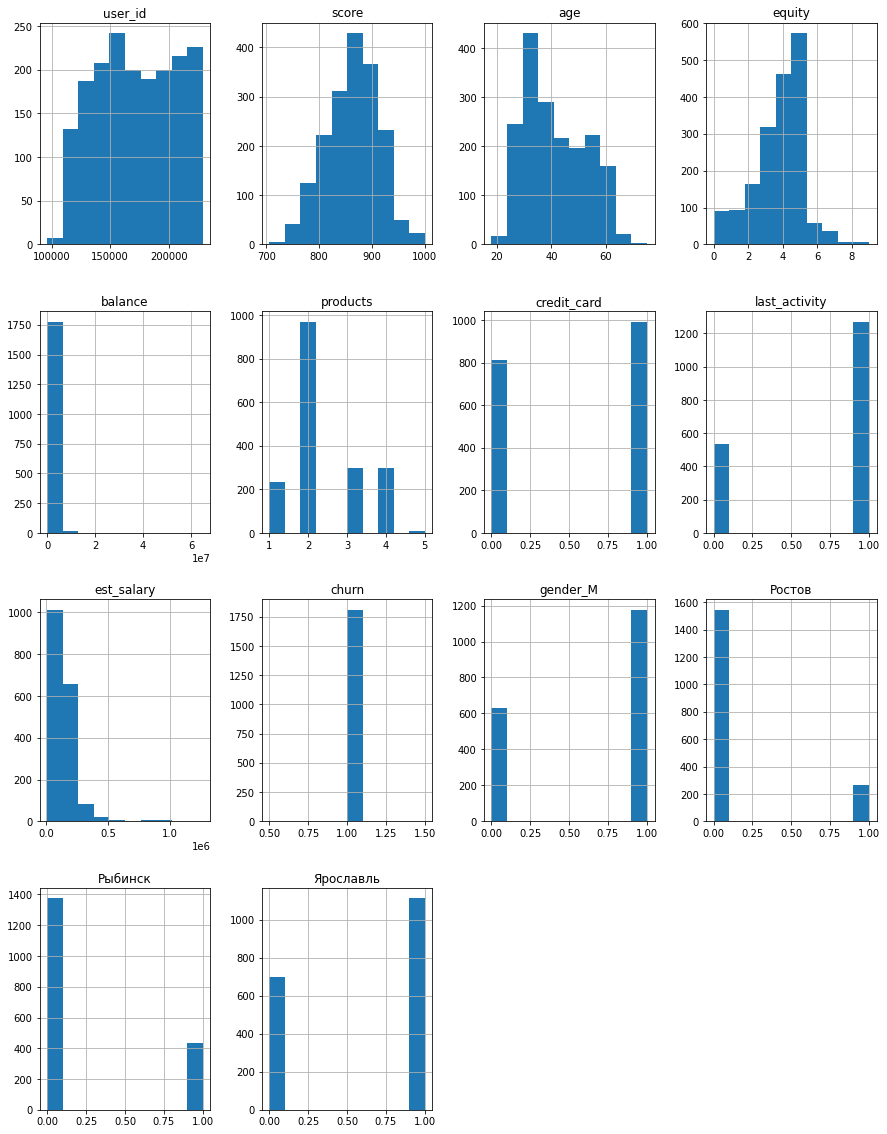

In [45]:
print('Выделяю срез данных ушедших клиентов и отображаю в виде матрицы распределения:')

data_m_churn1 = data_m[data_m['churn']==1]
data_m_churn0 = data_m[data_m['churn']==0]
print('Кол-во ушедших клиентов:', len(data_m_churn1))

data_m_churn1.hist(figsize=(15, 20));

In [46]:
print('Обзор значений параметров ушедших клиентов:')
display(data_m_churn1.describe())

print('Обзор значений параметров оставшихся клиентов:')
data_m_churn0.describe()

Обзор значений параметров ушедших клиентов:


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,1807.000000,1807.000000,1807.000000,1807.000000,1.795000e+03,1807.000000,1807.000000,1807.000000,1.807000e+03,1807.0,1807.000000,1807.000000,1807.000000,1807.000000
mean,172147.459878,863.467626,41.414499,3.765357,1.135842e+06,2.377975,0.550083,0.703376,1.483206e+05,1.0,0.650249,0.145545,0.239624,0.614831
std,33509.952372,49.571541,11.154570,1.588391,2.039294e+06,0.922478,0.497623,0.456896,1.231293e+05,0.0,0.477023,0.352747,0.426972,0.486770
min,96404.000000,706.000000,18.000000,0.000000,6.000000e+00,1.000000,0.000000,0.000000,1.088027e+04,1.0,0.000000,0.000000,0.000000,0.000000
25%,143924.500000,828.000000,32.000000,3.000000,3.907640e+05,2.000000,0.000000,0.000000,8.319661e+04,1.0,0.000000,0.000000,0.000000,0.000000
50%,171876.000000,867.000000,39.000000,4.000000,7.869112e+05,2.000000,1.000000,1.000000,1.253860e+05,1.0,1.000000,0.000000,0.000000,1.000000
75%,201991.500000,898.000000,52.000000,5.000000,1.348101e+06,3.000000,1.000000,1.000000,1.758354e+05,1.0,1.000000,0.000000,0.000000,1.000000
max,229052.000000,1000.000000,75.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.263028e+06,1.0,1.000000,1.000000,1.000000,1.000000


Обзор значений параметров оставшихся клиентов:


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,8116.000000,8116.000000,8116.000000,8116.000000,5.860000e+03,8116.000000,8116.000000,8116.000000,8.116000e+03,8116.0,8116.000000,8116.000000,8116.000000,8116.000000
mean,171648.751355,845.438517,43.032898,2.380360,7.346238e+05,1.758995,0.708970,0.482134,1.477450e+05,0.0,0.467348,0.140956,0.275382,0.583662
std,33741.432089,68.007002,12.374612,1.972042,1.958549e+06,0.712929,0.454265,0.499711,1.427701e+05,0.0,0.498963,0.347998,0.446734,0.492981
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.0,0.000000,0.000000,0.000000,0.000000
25%,142284.750000,796.000000,34.000000,0.000000,2.797238e+05,1.000000,0.000000,0.000000,7.348707e+04,0.0,0.000000,0.000000,0.000000,0.000000
50%,172752.500000,848.000000,40.000000,3.000000,4.756878e+05,2.000000,1.000000,0.000000,1.182335e+05,0.0,0.000000,0.000000,0.000000,1.000000
75%,200949.500000,900.000000,51.000000,4.000000,8.541819e+05,2.000000,1.000000,1.000000,1.740787e+05,0.0,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,0.0,1.000000,1.000000,1.000000,1.000000


<b>Анализ разницы значений по параметрам, позволяет сделать следующие выводы о клиентах:</b>

<b>Клиенты с churn==1:</b>

* имеют чуть больше собственности (медиана = 3,76);
* их медианных баланс равен 1 млн 135 тыс. руб. (почти в 2 раза выше чем у оставшихся);
* они реже оформляют кредитные карты (медиана 55%);
* они пользуются чуть большим числом продуктов 2-3 (медиана = 2,37);
* их медианный доход незначительно выше (148 320 руб);
* активность выше (медиана = 70%).

<b>Клиенты с churn==0:</b>

* имеют чуть меньше собственности (медиана = 2,38)
* их медианных баланс равен 734 тыс. руб. (почти в 2 раза ниже чем у ушедших);
* они чаще оформляют кредитные карты (медиана 70%);
* они пользуются чуть меньшим числом продуктов 1-2 (медиана = 1,75);
* их медианный доход незначительно ниже (147 745 руб);
* активность ниже (медиана = 48%).

По обзору можно отметить следующие, наиболее значимые признаки:
- оценки баллов собственности от 3 до 5;
- баланс от 390 тыс руб до 1348 тыс руб;
- кол-во продуктов от 2 до 3;
- активность выше, около 70%.

## Распределение баланса у отточных клиентов

In [47]:
data_m_churn1['balance'].describe() # посмотрим описание распределения баланса у отточных клитентов

count    1.795000e+03
mean     1.135842e+06
std      2.039294e+06
min      6.000000e+00
25%      3.907640e+05
50%      7.869112e+05
75%      1.348101e+06
max      6.486621e+07
Name: balance, dtype: float64

Баланс у отточных клиентов распределен от 390 тыс рублей (по Q1) и до 1 млн 348 тыс рублей (по Q3)

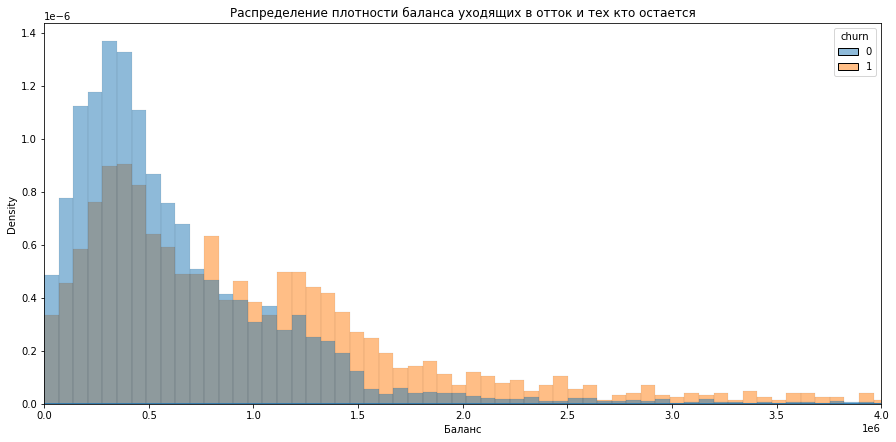

In [48]:
plt.figure(figsize = (15,7))
sns.histplot(data=data_m, x='balance', hue='churn', stat="density", common_norm=False)
plt.axhline()
plt.xlabel('Баланс')
#plt.ylabel('Кол-во клиентов')
plt.title('Распределение плотности баланса уходящих в отток и тех кто остается')
plt.xlim(0, 4000000)
plt.show()

В сравнении групп разница заметна! Баланс у отточных клиентов выше. Диапазон преобладания отточных клиентов от 1 млн 200 тыс до 4 млн рублей. Оствашиеся клиенты преобладают в диапазоне от менее 100 тыс до 700 тыс рублей.

## Распределение дохода у отточных клиентов

In [49]:
data_m_churn1['est_salary'].describe() # посмотрим описание распределения дохода у отточных клитентов

count    1.807000e+03
mean     1.483206e+05
std      1.231293e+05
min      1.088027e+04
25%      8.319661e+04
50%      1.253860e+05
75%      1.758354e+05
max      1.263028e+06
Name: est_salary, dtype: float64

Доход у отточных клиентов распределен от 83 тыс рублей (по Q1) и до 175 тыс рублей (по Q3)

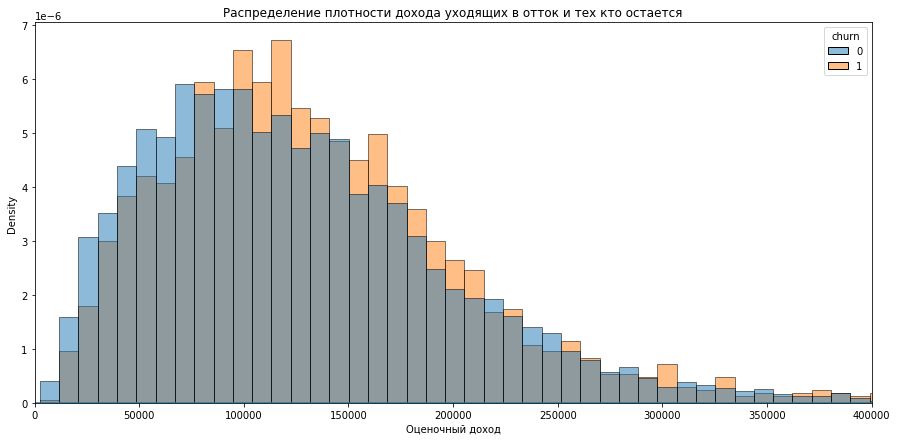

In [50]:
plt.figure(figsize = (15,7))
sns.histplot(data=data_m, x='est_salary', hue='churn', stat="density", common_norm=False)
plt.axhline()
plt.xlabel('Оценочный доход')
#plt.ylabel('Кол-во клиентов')
plt.title('Распределение плотности дохода уходящих в отток и тех кто остается')
plt.xlim(0, 400000)
plt.show()

Разница в дохода между теми кто уходит и остается - есть. Уходящие клиенты преобладают в диапазоне доходов от 100 тыс до 210 тыс руб (а те кто остается в диапазоне доходов от 10 тыс до 90 тыс руб). Так как 75% клиентов зарабатывают меньше 175 тыс, установил диапазон показа до 400 тыс руб.

### Обзор распределения возраста ушедших клиентов

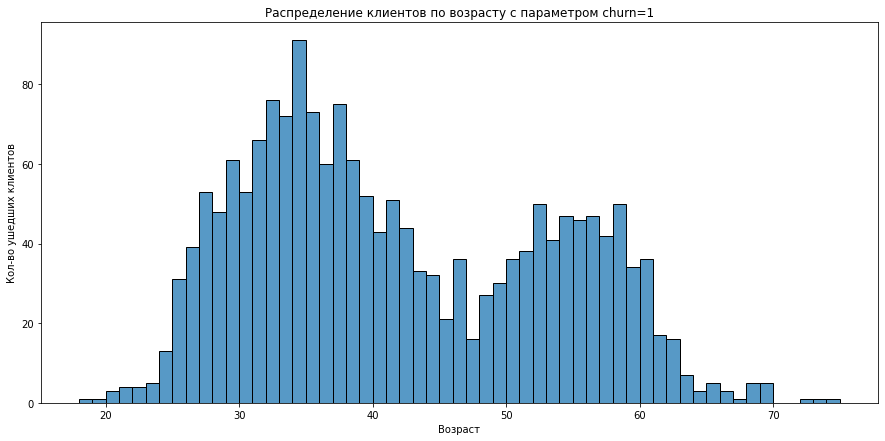

In [51]:
plt.figure(figsize = (15,7))
sns.histplot(x='age', data=data_m_churn1, multiple='stack', binwidth=1)
plt.xlabel('Возраст')
plt.ylabel('Кол-во ушедших клиентов')
plt.title('Распределение клиентов по возрасту с параметром churn=1')
plt.show()

Text(0.5, 1.0, 'Распределение по возрасту уходящих в отток и тех кто остается')

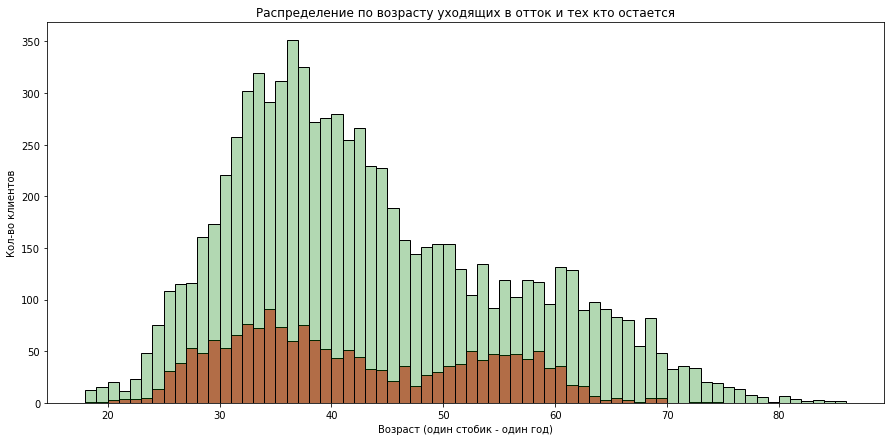

In [52]:
plt.figure(figsize = (15,7))
sns.histplot(data_m['age'][data_m['churn']==1],label='1', color='red', alpha=0.6, binwidth=1)
sns.histplot(data_m['age'][data_m['churn']==0],label='0', color='green', alpha=0.3, binwidth=1)
plt.xlabel('Возраст (один стобик - один год)')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение по возрасту уходящих в отток и тех кто остается')
#plt.legend()
#plt.show()

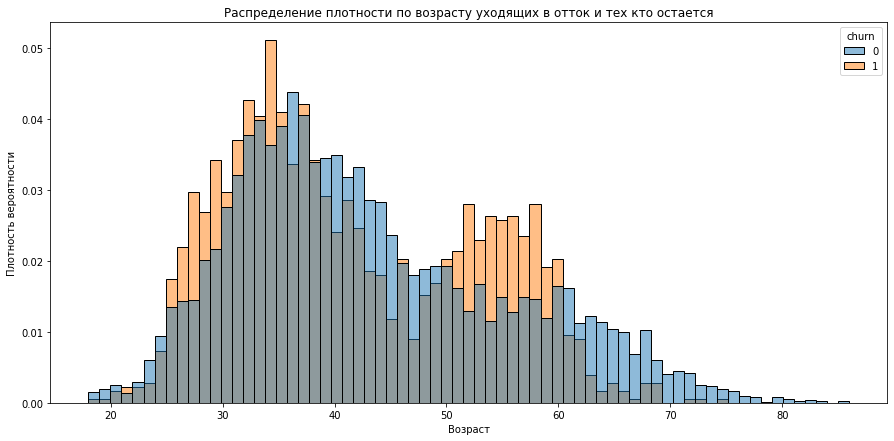

In [53]:
plt.figure(figsize = (15,7))
sns.histplot(data=data_m, x='age', hue='churn', stat="density", common_norm=False, bins=int((max(data_m['age']) - min(data_m['age'])) + 1))
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.title('Распределение плотности по возрасту уходящих в отток и тех кто остается')
plt.show()

<b>На данном графике видно, что преобладание оттока над теми кто остается - в возрасте: </b>
* с 25 до 35 лет,
* с 50 лет до 60 лет.

### Обзор распределения собственности у ушедших клиентов

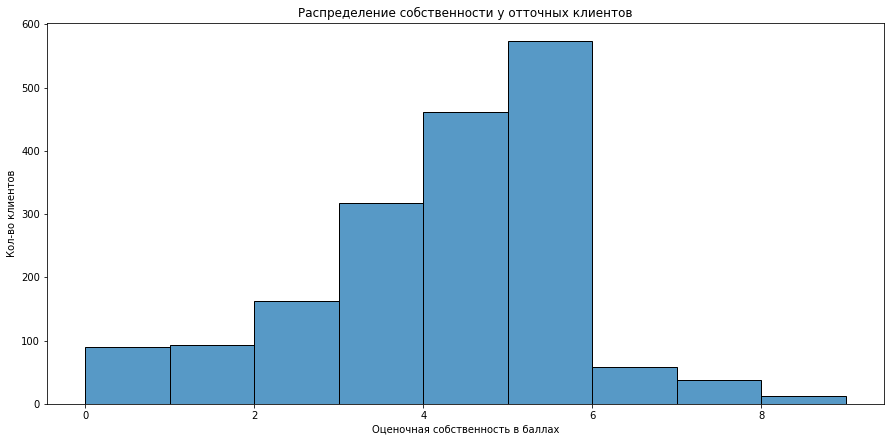

In [54]:
plt.figure(figsize = (15,7))
sns.histplot(x='equity', data=data_m_churn1, multiple='stack', binwidth=1)
plt.xlabel('Оценочная собственность в баллах')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение собственности у отточных клиентов')
plt.show()

<b>Признак отточности по баллам собственности, у клиентов с баллами 3-4-5. То, есть склонность уходить преобладает у клиентов с малым количеством собственности.</b>

In [55]:
#data_m_churn1['equity'].plot(kind='hist', bins=30, edgecolor='black');

In [56]:
#data_m_churn1['products'].plot(kind='hist', bins=30, edgecolor='black');

### Обзор распределения кол-ва продуктов ушедших клиентов

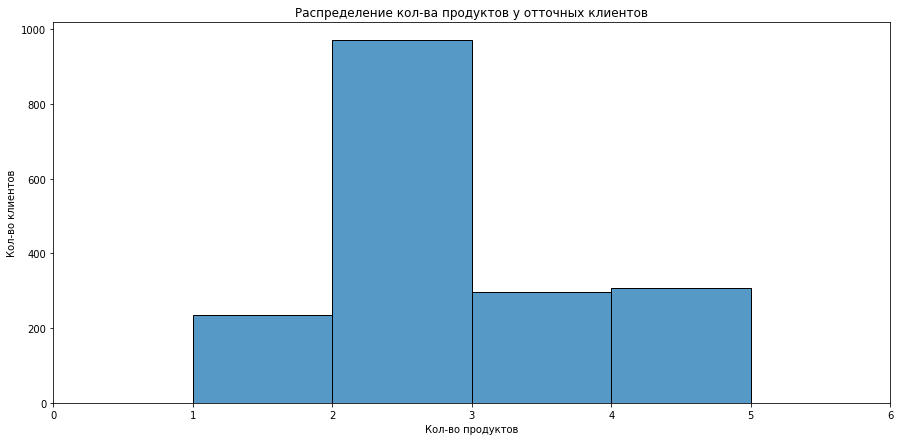

In [57]:
plt.figure(figsize = (15,7))
sns.histplot(x='products', data=data_m_churn1, multiple='stack', binwidth=1)
plt.xlabel('Кол-во продуктов')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение кол-ва продуктов у отточных клиентов')
plt.xlim(0, 6)
plt.show()

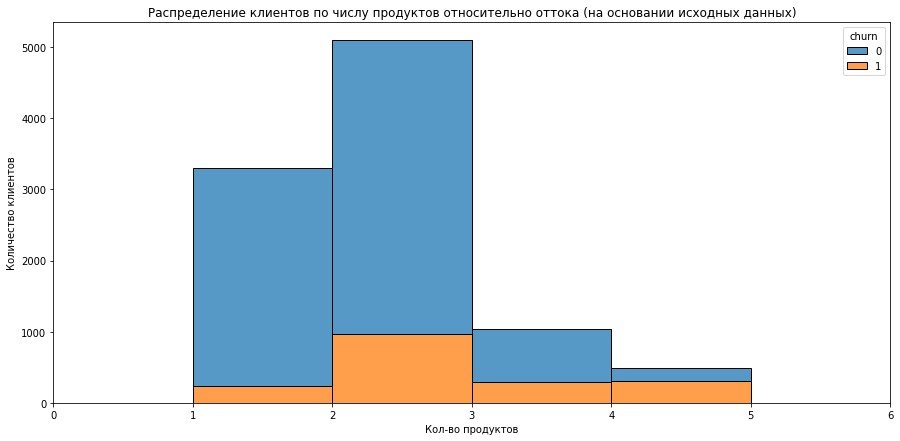

In [58]:
plt.figure(figsize = (15,7))
sns.histplot(x='products', data=data_m, hue= 'churn', multiple='stack', binwidth=1)
plt.xlabel('Кол-во продуктов')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по числу продуктов относительно оттока (на основании исходных данных)')
plt.xlim(0, 6)
plt.show()

<b>Ещё один признак - наличие 2х продуктов у клиента.</b>

### Обзор распределения кредитного рейтинга ушедших и оставшихся клиентов

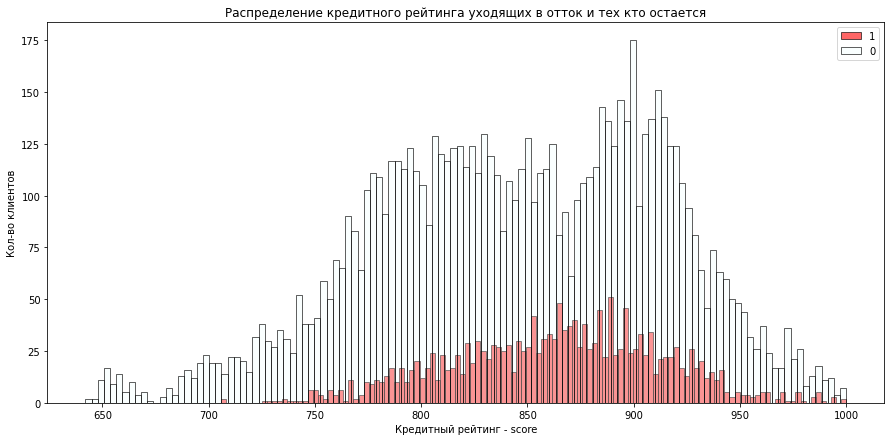

In [59]:
plt.figure(figsize = (15,7))
sns.histplot(data_m['score'][data_m['churn']==1],label='1', color='red', alpha=0.6, bins=123)
sns.histplot(data_m['score'][data_m['churn']==0],label='0', color='azure', alpha=0.3, bins=123)
plt.xlabel('Кредитный рейтинг - score')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение кредитного рейтинга уходящих в отток и тех кто остается')
plt.legend()
plt.show()

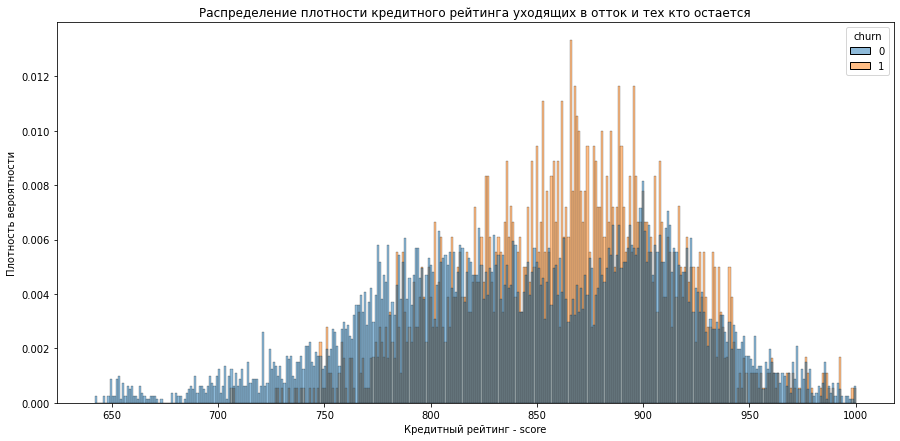

In [60]:
plt.figure(figsize = (15,7))
sns.histplot(data=data_m, x='score', hue='churn', stat="density", common_norm=False, bins=int((max(data_m['score']) - min(data_m['score'])) + 1))
plt.xlabel('Кредитный рейтинг - score')
plt.ylabel('Плотность вероятности')
plt.title('Распределение плотности кредитного рейтинга уходящих в отток и тех кто остается')
plt.show()

Преобладают по оттоку, клиенты с кредитным рейтингом:
* от 820 и до 900 баллов,
* от 900 до 940 баллов (частично).

Они представляют наибольшую ценность по вопросу - рекомендаций по удержанию потенциально отточных клиентов!

In [61]:
print('Медиана скоринга ушедших клиентов =', data_m_churn1['score'].median())
print('Медиана скоринга оставшихся клиентов =', data_m_churn0['score'].median())

Медиана скоринга ушедших клиентов = 867.0
Медиана скоринга оставшихся клиентов = 848.0


Медиана кредитного рейтинга уходящих клиентов чуть выше.

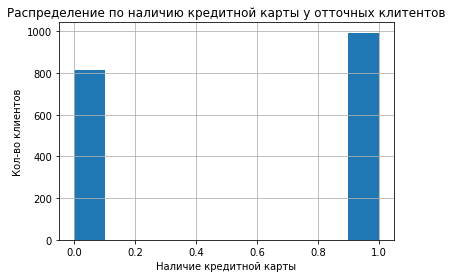

In [62]:
ax = data_m_churn1['credit_card'].plot(kind='hist', title='Распределение по наличию кредитной карты у отточных клитентов', grid=True)
ax.set_xlabel('Наличие кредитной карты')
ax.set_ylabel('Кол-во клиентов')
plt.show()

In [63]:
# подсчет кол-ва кредитных карт у отточных клиентов

len(data_m_churn1[data_m_churn1['credit_card']==1])

994

In [64]:
d_credit_card = len(data_m_churn1[data_m_churn1['credit_card']==1]) / len(data_m_churn1)

print('Отношение наличия кол-ва кредитных карт у отточных клиентов:', f"{d_credit_card:.2%}")

Отношение наличия кол-ва кредитных карт у отточных клиентов: 55.01%


In [65]:
d_churn1 = len(data_m[data_m['churn']==1])
count_data_m = len(data_m)
d_churn = d_churn1 / count_data_m
print('Величина уровня оттока клиентов по датафрейму', f'{d_churn:.4f}')

Величина уровня оттока клиентов по датафрейму 0.1821


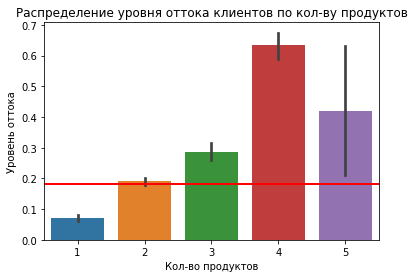

In [66]:
ax = sns.barplot(data=data_m, x='products', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока клиентов по кол-ву продуктов')
plt.show()

<b>По стобчатой диаграмме видно, что уровень оттока клиентов по кол-ву продуктов следующий:</b>

* Лидируют клиенты с 4 продуктами!
* На втором месте по отточности, клиенты с 5 продуктами.
* И завершают превосходство по уровню оттока (относительно величины отточности по всему датафрейму), клиенты с 3 и немногим выше стреднего клиенты с 2 продуктами.

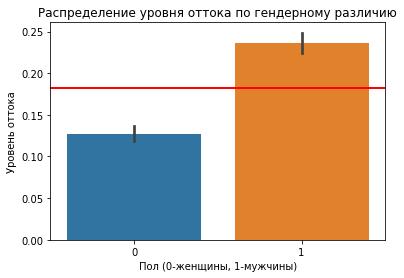

In [67]:
ax = sns.barplot(data=data_m, x='gender_М', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Пол (0-женщины, 1-мужчины)')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока по гендерному различию')
plt.show()

Мужчины чаще уходят в отток.

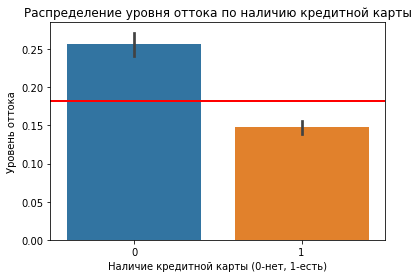

In [68]:
ax = sns.barplot(data=data_m, x='credit_card', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Наличие кредитной карты (0-нет, 1-есть)')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока по наличию кредитной карты')
plt.show()

Клиенты без кредитки чаще уходят в отток.

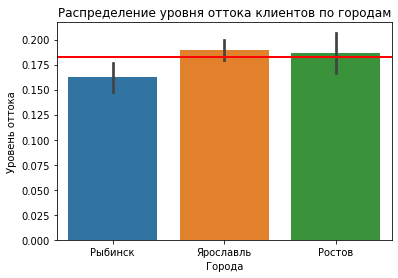

In [69]:
ax = sns.barplot(data=data_m, x='city', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Города')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока клиентов по городам')
plt.show()

Клиенты в городе Ярославль немного опрежают средний отток по датафрейму, за ними следуют клиенты в Ростове. А в Рыбинске, живут менее отточные клиенты!

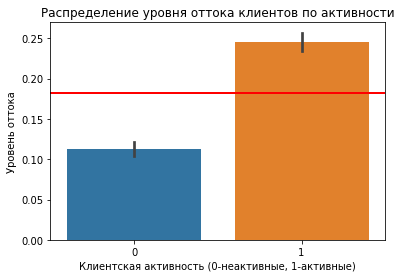

In [70]:
ax = sns.barplot(data=data_m, x='last_activity', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Клиентская активность (0-неактивные, 1-активные)')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока клиентов по активности')
plt.show()

Активные клиенты опрежают средний отток по датафрейму, а вот неактивные - реже уходят.

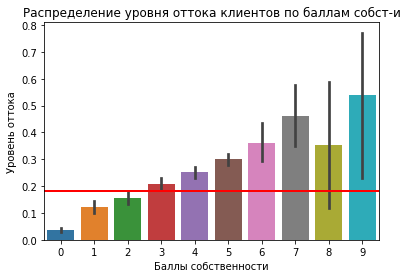

In [71]:
ax = sns.barplot(data=data_m, x='equity', y='churn')
height = d_churn
plt.axhline(y=height, linewidth=2, color='r')
plt.xlabel('Баллы собственности')
plt.ylabel('Уровень оттока')
plt.title('Распределение уровня оттока клиентов по баллам собст-и')
plt.show()

Лидируют опрежая средний отток по датафрейму, клиенты с 9 и 7 баллами, далее следуют с 6 и 8 баллами и завершают превышение отметки, клиенты с 5-4-3 баллами. Остальные, реже уходят в отток.

[Наверх к содержанию](#содержание)

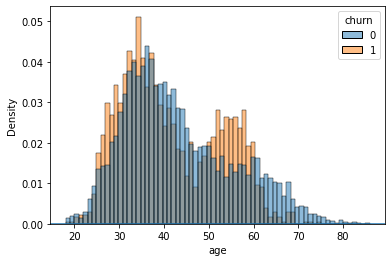

In [72]:
sns.histplot(data=data_m, x='age', hue='churn', stat="density", common_norm=False, bins=int((max(data_m['age']) - min(data_m['age'])) + 1))
plt.axhline()
plt.show()

# Шаг 3.2 Анализ корреляции признаков между собой. <a class="anchor" id="eda2"></a>

### Корреляция признаков между собой

                    age     churn    equity  last_activity  products
age            1.000000 -0.051295  0.019999      -0.007087  0.016514
churn         -0.051295  1.000000  0.269787       0.170939  0.301538
equity         0.019999  0.269787  1.000000      -0.001553  0.430973
last_activity -0.007087  0.170939 -0.001553       1.000000  0.037448
products       0.016514  0.301538  0.430973       0.037448  1.000000


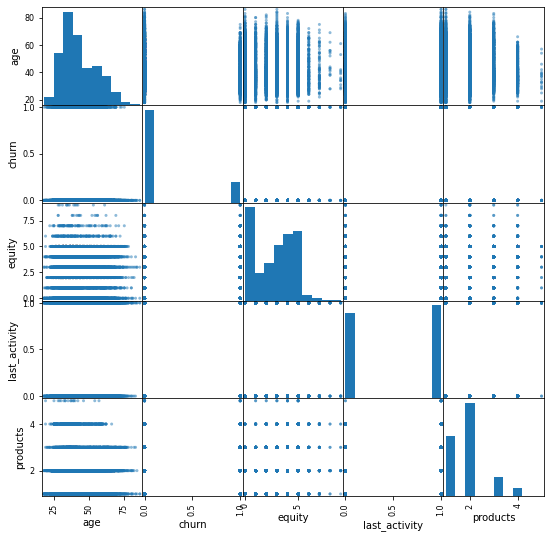

In [73]:
multi_priznak = data_m.pivot_table(index='user_id', values=['churn', 'equity', 'age', 'products', 'last_activity'])

print(multi_priznak.corr())
pd.plotting.scatter_matrix(multi_priznak, figsize=(9, 9));

In [74]:
# создаю дублирующий датасет, отдельно для корреляции данных
corr_data = data_m.copy()

In [75]:
# удалим колонку user_id, она в анализе не участвует
corr_data = corr_data.drop(['user_id'], axis=1)

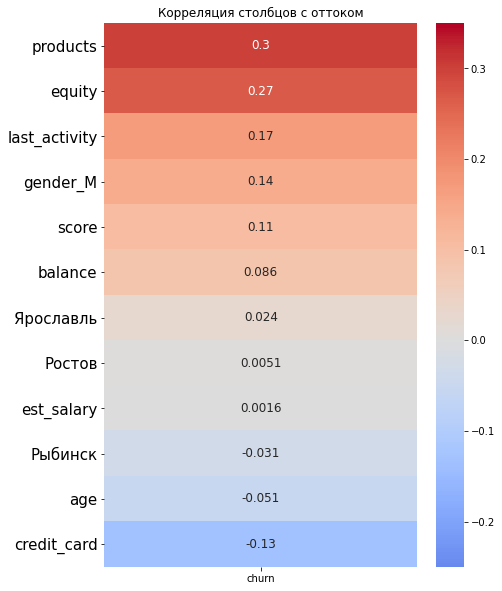

In [76]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(corr_data.corr()[['churn']].sort_values(by='churn', ascending=False).drop(['churn'], axis=0), \
                      vmin=-0.25, vmax=0.35, annot=True, annot_kws={"size":12}, cmap='coolwarm', center=0)
plt.tick_params(axis='y', labelsize=15)
heatmap.set_title('Корреляция столбцов с оттоком')
plt.yticks(rotation=0, 
           ha='right')
plt.show()

<b>Отмечу признаки, где корреляция положительная или отрицательная больше 10%. По этим критериям на отточность в большей степени влияет:</b>
   * кол-во банковских продуктов (на уровне = 30%), 
   * кол-во баллов собственности (на уровне = 27%), 
   * клиентская активность (на уровне = 17%),  
   * половой признак (на уровне=14%), 
   * оценки скоринга (на уровне=11%) и 
   * отсутствие кредитной карты (на уровне = -13%) поэтому отрицательная корреляция.

[Наверх к содержанию](#содержание)

# Шаг 3.3 Анализ типичных портретов клиентов в разрезе оттока. <a class="anchor" id="eda3"></a>

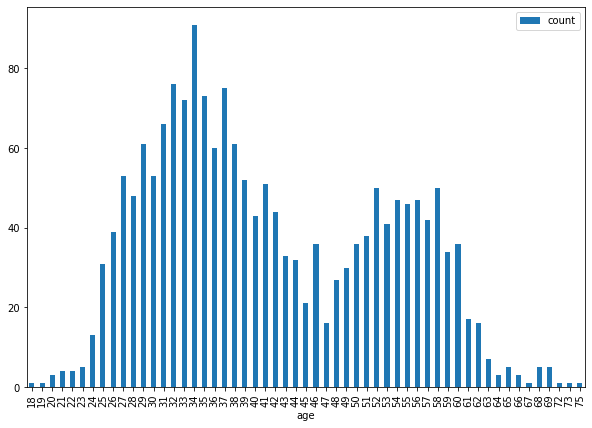

In [77]:
# посмотрим распределение отточных клиентов по возрасту:

data_m_churn1['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').plot(kind='bar', figsize = (10,7), x = 'age', y = 'count');

<b>Выделяя возрастные группы с пользователями, имеющим схожие паттерны оттока: (их условно 4 группы)</b>
* с 18 до 24 лет,
* с 25 лет до 45 - большинство!
* с 46 лет до 62 - таких чуть меньше, чем во второй группе,
* 63+ их также мало как и в первой группе.

In [78]:
# создадим функцию age_group для распределения клиентов по возрастным группам:

def age_group(age):
    if 25 > age >= 18:
        return '18-24'
    if 45 >= age >= 25:
        return '25-45'
    if 62 >= age >= 46:
        return '46-62'
    if 63 <= age:
        return '63+'   

In [79]:
# применю функцию age_group и добавлю новый столбец `age_group`

data_m['age_group'] = data_m['age'].apply (age_group)
display (data_m[data_m['churn']==1].head())

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,cat_salary,Ростов,Рыбинск,Ярославль,age_group
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,0,средний,0,1,0,25-45
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,0,выше среднего,0,0,1,46-62
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,1,средний,0,0,1,25-45
12,132970.0,845,Ярославль,31,3,591928.52,2,1,1,112697.16,1,0,выше среднего,0,0,1,25-45
40,129705.0,811,Рыбинск,34,2,129799.35,1,0,0,96242.71,1,1,средний,0,1,0,25-45


Полученные категориальные значения по возрасту необходимо кодировать, чтобы получилось рассчитать корреляцию для каждого возрастного сегмента:

In [80]:
# создадим копию столбца age_group:

data_m['age_group_2']=data_m['age_group']
display (data_m[data_m['churn']==1].head())

data_m_churn1 = data_m[data_m['churn']==1] # обновим переменную, так как внесены изменения в исходник
data_m_churn0 = data_m[data_m['churn']==0] # обновим переменную, так как внесены изменения в исходник

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,cat_salary,Ростов,Рыбинск,Ярославль,age_group,age_group_2
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,0,средний,0,1,0,25-45,25-45
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,0,выше среднего,0,0,1,46-62,46-62
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,1,средний,0,0,1,25-45,25-45
12,132970.0,845,Ярославль,31,3,591928.52,2,1,1,112697.16,1,0,выше среднего,0,0,1,25-45,25-45
40,129705.0,811,Рыбинск,34,2,129799.35,1,0,0,96242.71,1,1,средний,0,1,0,25-45,25-45


In [81]:
# кодируем данные в столбце age_group_2:

data_m = pd.get_dummies(data_m, columns = ['age_group_2'])
data_m = data_m.rename (columns = ({
    'age_group_2_18-24':'18-24', 'age_group_2_25-45':'25-45','age_group_2_46-62':'46-62', 
    'age_group_2_63+':'63+'}))
display (data_m.head())

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,...,gender_М,cat_salary,Ростов,Рыбинск,Ярославль,age_group,18-24,25-45,46-62,63+
0,183012.0,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,...,0,средний,0,1,0,25-45,0,1,0,0
1,146556.0,861,Рыбинск,37,5,850594.33,3,1,0,86621.77,...,0,средний,0,1,0,25-45,0,1,0,0
2,120722.0,892,Рыбинск,30,0,NaN,1,1,1,107683.34,...,0,выше среднего,0,1,0,25-45,0,1,0,0
3,225363.0,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,...,0,выше среднего,0,0,1,46-62,0,0,1,0
4,157978.0,730,Ярославль,34,5,174.00,1,1,0,67353.16,...,1,средний,0,0,1,25-45,0,1,0,0


In [82]:
data_m_churn1 = data_m[data_m['churn']==1] # обновим переменную, так как внесены изменения в исходник
data_m_churn0 = data_m[data_m['churn']==0] # обновим переменную, так как внесены изменения в исходник

In [83]:
# создаю дублирующий датасет, отдельно для корреляции данных
corr_data1 = data_m.copy()

In [84]:
# удалим колонку user_id, она в анализе не участвует
corr_data1 = corr_data1.drop(['user_id'], axis=1)

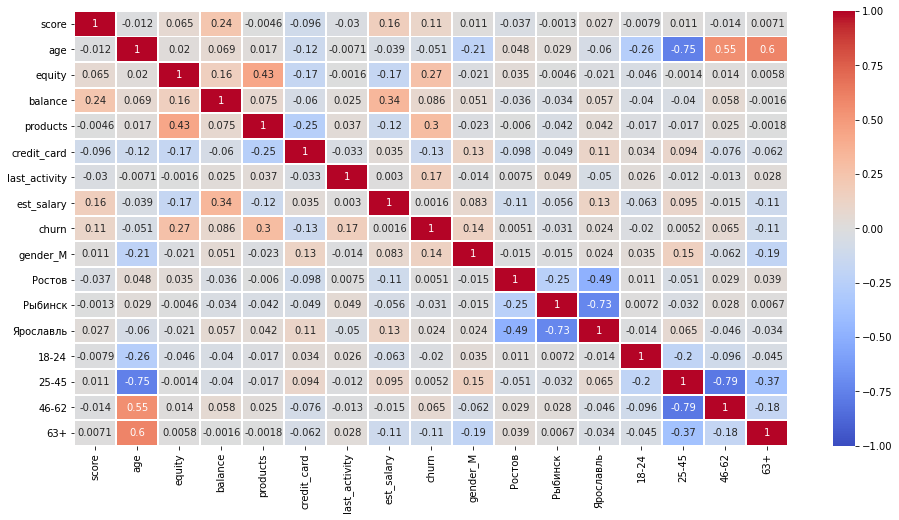

In [85]:
# вызовем метод corr(), чтобы найти коэффициент корреляции для всех столбцов, и построим тепловую карту:

plt.figure(figsize=(16,8))
sns.heatmap (corr_data1.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

## Построим портрет типичного клиента склонного к оттоку по уровню корреляции. Возьмем 6 параметров:

* `products`,
* `equity`,
* `last_activity`,
* `gender_М`,
* `score`,
* `balance`.

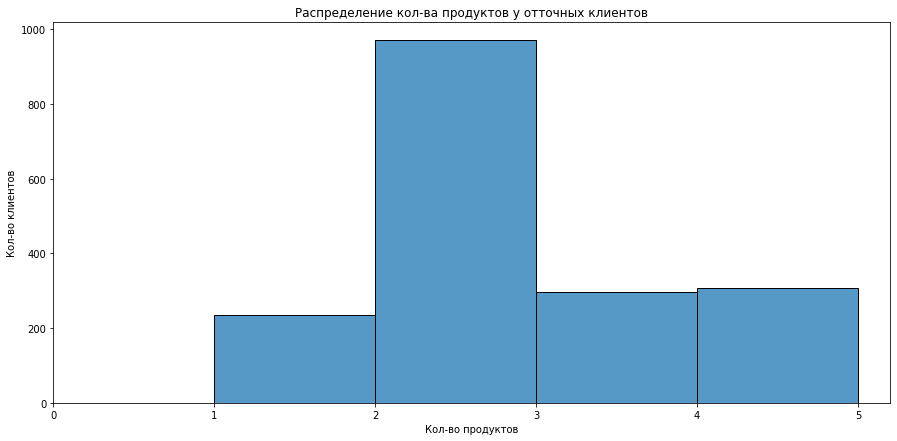

In [86]:
x = [0, 1, 2, 3, 4, 5]
plt.figure(figsize = (15,7))
sns.histplot(x='products', data=data_m_churn1, multiple='stack', binwidth=1)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Кол-во продуктов')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение кол-ва продуктов у отточных клиентов')
plt.show()

<b>Это клиенты, пользуещиеся преимущественно 2мя продуктами, иногда 3-4.</b>

,sum,count,perc
products,,,
1,234,3305,7.08
2,970,5094,19.04
3,297,1035,28.70
4,298,470,63.40
5,8,19,42.11


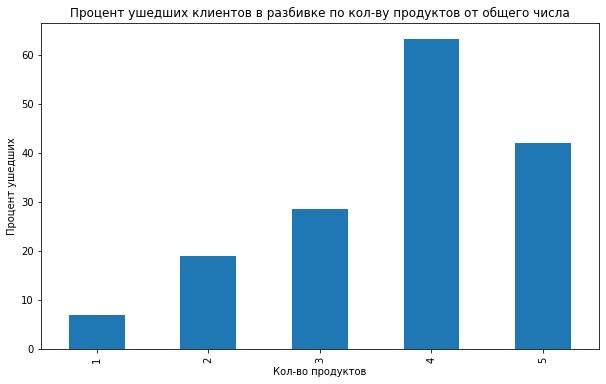

In [87]:
# рассчитаем процент ушедших клиентов в разбивке по кол-ву продуктов от общего числа:

products_churn = data_m.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['perc'] = (products_churn['sum']/products_churn['count']*100).round(2)

# построим столбчатую диаграмму:
products_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по кол-ву продуктов от общего числа',
    xlabel = 'Кол-во продуктов', ylabel = 'Процент ушедших', figsize = (10,6));
products_churn

<b>Лидируют по процентам отточности клиенты с 4 продуктами, далее с 5 и 3мя!</b>

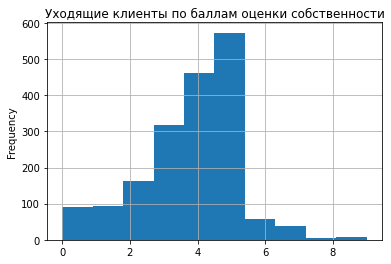

In [88]:
data_m_churn1['equity'].plot(kind='hist', grid=True, title='Уходящие клиенты по баллам оценки собственности');

<b>У таких клиентов, кол-во баллов о собственности в основном 3-4-5!</b>

,sum,count,perc
equity,,,
0,90,2563,3.51
1,93,768,12.11
2,163,1047,15.57
3,318,1525,20.85
4,462,1838,25.14
5,573,1911,29.98
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


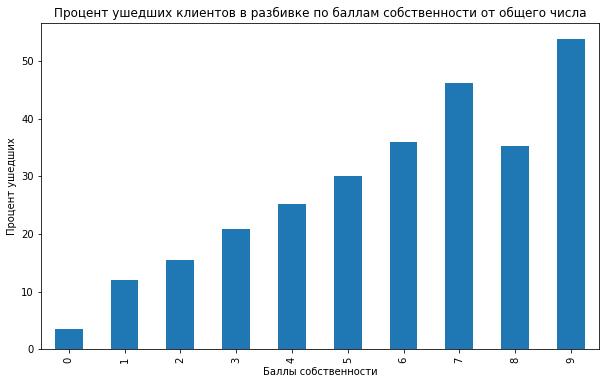

In [89]:
# рассчитаем процент ушедших клиентов в разбивке по баллам собственности от общего числа:

equity_churn = data_m.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['perc'] = (equity_churn['sum']/equity_churn['count']*100).round(2)

# построим столбчатую диаграмму:
equity_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по баллам собственности от общего числа',
    xlabel = 'Баллы собственности', ylabel = 'Процент ушедших', figsize = (10,6));
equity_churn

<b>Лидируют по процентам отточности клиенты с высокими баллами о собственности. Чем выше балл, тем выше процент отточности!Но, такая зависимость не 100%. Так, например максимальный отток по баллам у 9 - 53%, далее 7 - 46%, далее 6 -36% и 8 - 35%..</b> 

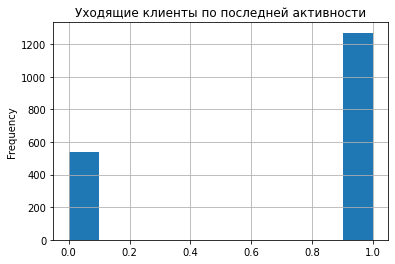

In [90]:
data_m_churn1['last_activity'].plot(kind='hist', grid=True, title='Уходящие клиенты по последней активности');

<b>Чаще - активные клиенты.</b>

,sum,count,perc
last_activity,,,
0,536,4739,11.31
1,1271,5184,24.52


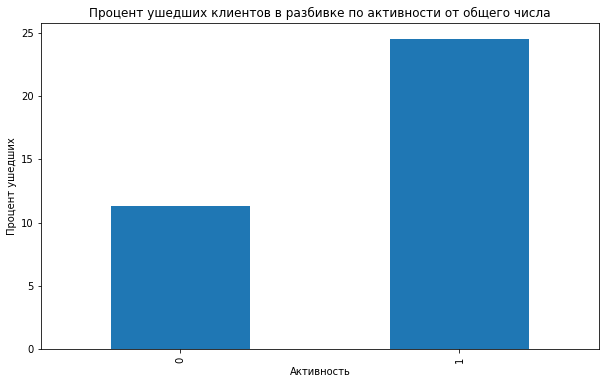

In [91]:
# рассчитаем процент ушедших клиентов в разбивке по активности от общего числа:

la_churn = data_m.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
la_churn.columns = la_churn.columns.droplevel(level=1)
la_churn ['perc'] = (la_churn['sum']/la_churn['count']*100).round(2)

# построим столбчатую диаграмму:
la_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по активности от общего числа',
    xlabel = 'Активность', ylabel = 'Процент ушедших', figsize = (10,6));
la_churn

<b>Лидируют по процентам отточности клиенты активные - 24%, у неактивных отток - 11%</b>

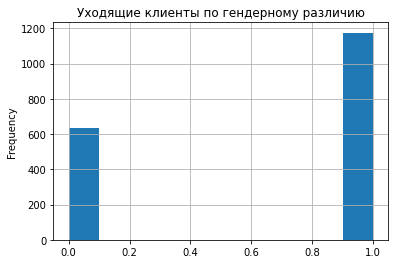

In [92]:
data_m_churn1['gender_М'].plot(kind='hist', grid=True, title='Уходящие клиенты по гендерному различию');

<b>Типичным клиентом склонным к оттоку, по гендерному различию - преимущественно мужчины (примерно 2/3).</b>

,sum,count,perc
gender_М,,,
0,632,4955,13.34
1,1175,4968,22.67


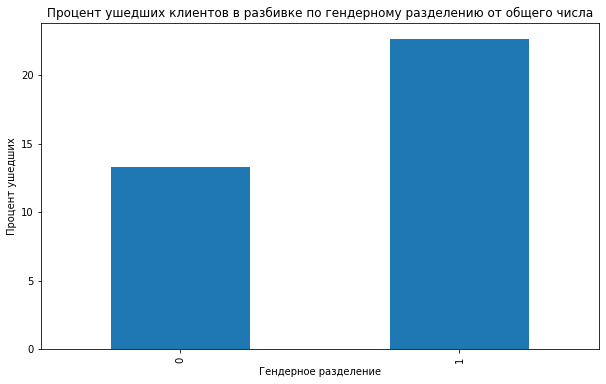

In [93]:
# рассчитаем процент ушедших клиентов в разбивке по активности от общего числа:

gender_churn = data_m.pivot_table (index = 'gender_М', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = (gender_churn['sum']/la_churn['count']*100).round(2)

# построим столбчатую диаграмму:
gender_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по гендерному разделению от общего числа',
    xlabel = 'Гендерное разделение', ylabel = 'Процент ушедших', figsize = (10,6));
gender_churn

<b>Лидируют по процентам отточности мужчины - 22%, у женщин отток - 13%</b>

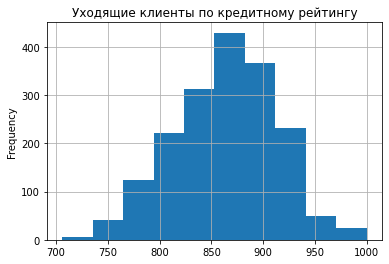

In [94]:
data_m_churn1['score'].plot(kind='hist', grid=True, title='Уходящие клиенты по кредитному рейтингу');

<b>У них достаточно хороший кредитный рейтинг, у большинства он в диапазоне от 800 до 940.</b>

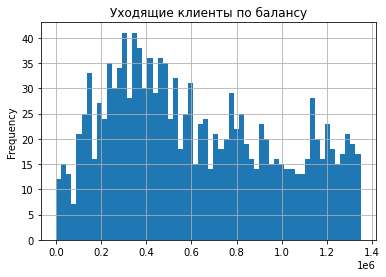

In [95]:
data_m_churn1['balance'].plot(kind='hist', grid=True, title='Уходящие клиенты по балансу', range=[0, 1350000], bins=60);

<b>Баланс данных клиентов находится в диапазоне от 100 до 800.</b>

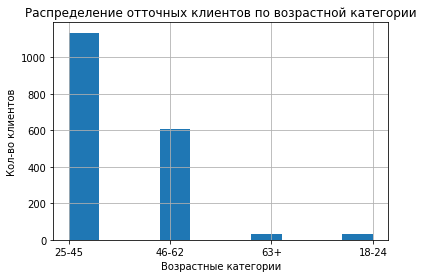

In [96]:
ax = data_m_churn1['age_group'].hist()
ax.set_title('Распределение отточных клиентов по возрастной категории')
ax.set_xlabel('Возрастные категории')
ax.set_ylabel('Кол-во клиентов')
plt.show()

<b>Это клиенты преимущественно в возрасте от 25 до 45 лет - больше 1000 и примерно 1/3 от 46 до 62 лет.</b>

In [97]:
print('Кол-во ушедших мужчин из банка')

len(data_m_churn1[data_m_churn1['gender_М']==1])

Кол-во ушедших мужчин из банка


1175

In [98]:
print('Отношение кол-ва мужчин в датасете оттока')

len(data_m_churn1[data_m_churn1['gender_М']==1]) / len(data_m_churn1)

Отношение кол-ва мужчин в датасете оттока


0.6502490315439956

In [99]:
# рассчитаем процент ушедших клиентов в разбивке по основным признакам относительно оставшихся от общего числа:

churn_data = data_m.pivot_table (index = 'churn', values = ['age', 'balance', 'equity', 'est_salary', 'products', 'score'],
                                 aggfunc = {'age':'median', 'balance':'median', 'equity':'median', 'est_salary':'mean',  'products':'mean', 'score':'median'})
churnT = churn_data.T

churnT [3] = ((churnT[1]/churnT[0]-1)*100).round(2)

churnT.columns = ['Клиент не ушел', 'Клиент ушел', 'Относительная разница в %']
churnT.round(2)

,Клиент не ушел,Клиент ушел,Относительная разница в %
age,40.00,39.00,-2.50
balance,475687.80,786911.18,65.43
equity,3.00,4.00,33.33
est_salary,147744.99,148320.62,0.39
products,1.76,2.38,35.19
score,848.00,867.00,2.24


Как видно по сводной таблице, значительными признаками в отток относительно оставшихся клиентов являются: `balance`, `product` и `equity`.

# Шаг 3.4 Сегментация клиентов по признакам отточности. <a class="anchor" id="eda4"></a>

### Сегмент №1 (клиенты с 2 и более продуктами, с баллами о собственности от 2 в возрасте 46+ лет)

* Пол: любой
* Возраст: 46+
* Город: любой
* Оценка объектов собственности: 2 и больше
* Скоринговый рейтинг: любой
* Количество используемых продуктов: 2 и больше
* Наличие кредитной карты: любое
* Пользовательская активность: любая

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [100]:
segment_1_с1 = data_m_churn1.query (
    'age>=46 and equity>=2 and products >= 2') 
len(segment_1_с1)

514

### Сегмент №2 (активные клиенты, мужчины в возрасте 25-45 лет)

* Пол: мужской
* Возраст: от 25 до 45 лет
* Город: любой
* Оценка объектов собственности: любая
* Скоринговый рейтинг: любой
* Количество используемых продуктов: любое
* Наличие кредитной карты: любое
* Пользовательская активность: есть

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [101]:
segment_2_с1 = data_m_churn1.query (
    'gender_М==1 and age>=25 and age<=45 and last_activity==1') 
len(segment_2_с1)

531

### Сегмент №3 (клиенты - мужчины, с кредитным рейтингом от 740 баллов и баллами о собственности 3 и более)

* Пол: мужской
* Возраст: любой
* Город: любой
* Оценка объектов собственности: 3 и больше
* Скоринговый рейтинг: 740 и больше
* Количество используемых продуктов: любое 
* Наличие кредитной карты: любое
* Пользовательская активность: любая

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [102]:
segment_3_с1 = data_m_churn1.query (
    'gender_М==1 and score>=740 and equity>=3')
len(segment_3_с1)

959

[Наверх к содержанию](#содержание)

# Шаг 3.5 Приоретизация сегментов. <a class="anchor" id="eda5"></a>

In [103]:
# срезы по сегментам

segment_1 = data_m.query('age>=46 and equity>=2 and products >= 2')  # сегмент 1 
segment_2 = data_m.query('gender_М==1 and age>=25 and age<=45 and last_activity==1')  # сегмент 2 
segment_3 = data_m.query('gender_М==0 and score>=740 and equity<=5') # сегмент 3 

print('Кол-во клиентов в сегменте 1 = ', len(segment_1))
print('Кол-во клиентов в сегменте 2 = ', len(segment_2))
print('Кол-во клиентов в сегменте 3 = ', len(segment_3))

Кол-во клиентов в сегменте 1 =  2032
Кол-во клиентов в сегменте 2 =  1777
Кол-во клиентов в сегменте 3 =  4607


In [104]:
print('Кол-во ушедших клиентов в сегменте 1 = ', len(segment_1_с1))
print('Кол-во ушедших клиентов в сегменте 2 = ', len(segment_2_с1))
print('Кол-во ушедших клиентов в сегменте 3 = ', len(segment_3_с1))

Кол-во ушедших клиентов в сегменте 1 =  514
Кол-во ушедших клиентов в сегменте 2 =  531
Кол-во ушедших клиентов в сегменте 3 =  959


In [105]:
# отношение ушедших клиентов к оставшимся

d_segment1 = len(segment_1_с1) / len(segment_1)
d_segment2 = len(segment_2_с1) / len(segment_2)
d_segment3 = len(segment_3_с1) / len(segment_3)
print('дельта оттока по первому сегменту', f"{d_segment1:.2%}") 
print('дельта оттока по второму сегменту', f"{d_segment2:.2%}") 
print('дельта оттока по третьему сегменту', f"{d_segment3:.2%}") 

дельта оттока по первому сегменту 25.30%
дельта оттока по второму сегменту 29.88%
дельта оттока по третьему сегменту 20.82%


<b>Лидирует по оттоку второй сегмент, с оттоком в 29,88%! Далее следует, первый сегмент - отток 25,30% и третий с уровнем оттока 20,82%. Отток в выделенных сегментах выше чем отток по всему датафрейму!</b> 

[Наверх к содержанию](#содержание)

# Шаг 3.6 Подведение промежуточных итогов. <a class="anchor" id="eda6"></a>

<b>Анализ разницы значений по параметрам, позволяет сделать следующие выводы о клиентах:</b>

<b>Клиенты с churn==1:</b>

* имеют чуть больше собственности (медиана = 3,76);
* их медианных баланс равен 1 млн 135 тыс. руб. (почти в 2 раза выше чем у оставшихся);
* они реже оформляют кредитные карты (медиана 55%);
* они пользуются чуть большим числом продуктов 2-3 (медиана = 2,37);
* их медианный доход незначительно выше (148 320 руб);
* активность выше (медиана = 70%).

<b>Клиенты с churn==0:</b>

* имеют чуть меньше собственности (медиана = 2,38)
* их медианных баланс равен 734 тыс. руб. (почти в 2 раза ниже чем у ушедших);
* они чаще оформляют кредитные карты (медиана 70%);
* они пользуются чуть меньшим числом продуктов 1-2 (медиана = 1,75);
* их медианный доход незначительно ниже (147 745 руб);
* активность ниже (медиана = 48%).

По обзору можно отметить следующие, наиболее значимые признаки:
- оценки баллов собственности;
- баланс;
- кол-во продуктов;
- клиентская активность.

<b>Признаки, где корреляция положительная или отрицательная и больше 10%. По этим критериям на отточность влияет:</b>
   * кол-во банковских продуктов (на уровне = 30%), 
   * кол-во баллов собственности (на уровне = 27%), 
   * клиентская активность (на уровне = 17%),  
   * половой признак (на уровне=14%), 
   * оценки скоринга (на уровне=11%) и 
   * отсутствие кредитной карты (на уровне = -13%) поэтому отрицательная корреляция.

<b>Таким образом я определил несколько сегментов клиентов склонных к оттоку: </b>
 В большинстве своем - активные клиенты 2/3 мужчин и 1/3 женщин, в возрасте от 25 до 45 лет.
 
 Сегменты:
   * 1) клиенты с 2 и более продуктами, с баллами о собственности от 2 в возрасте 46+ лет;
   * 2) активные клиенты, мужчины в возрасте 25-45 лет;
   * 3) клиенты - мужчины, с кредитным рейтингом от 740 баллов и баллами о собственности 3 и более.

<b>Лидирует по оттоку второй сегмент, с оттоком в 29,88%! Далее следует, первый сегмент - отток 25,30% и третий с уровнем оттока 20,82%. Отток в выделенных сегментах выше чем отток по всему датафрейму!</b> 

[Наверх к содержанию](#содержание)

# Шаг 4. Статистический анализ: <a class="anchor" id="stata"></a>

# Шаг 4.1 Статистическая гипотеза 1 (различаются ли доходы между теми клиентами, которые ушли и теми, которые остались). <a class="anchor" id="stata1"></a>

   * H0 = доходы ушедших и оствшихся клиентов не различаются.
   * H1 = доходы ушедших и оствшихся клиентов различаются!

<b>При выборе статичтического метода, я опираюсь на следующие вопросы:</b>
    
    1. Тип данных?
    2. Тип распределения?
    3. Кол-во групп?
    4. Связанность групп?

1. Тип данных?
    * `est_salary` - количественный тип данных

2. Тип распределения?
    * `est_salary` - по оценочному доходу данные распределены нормально!

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


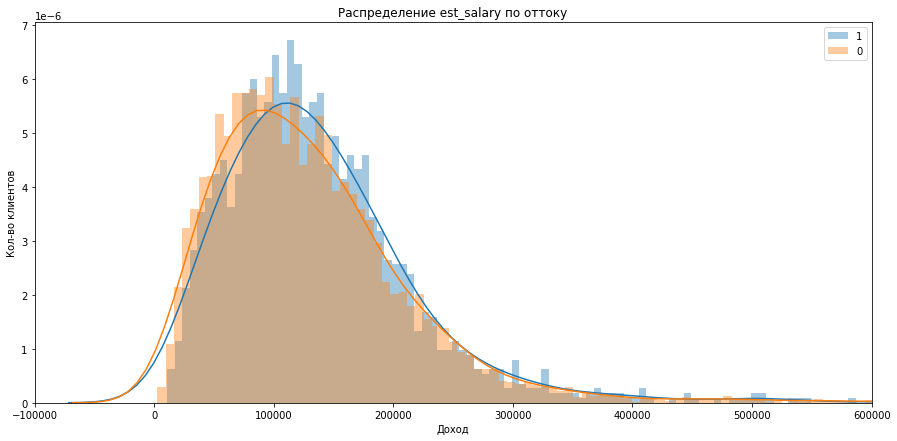

In [106]:
plt.figure(figsize = (15,7))
sns.distplot(data_m_churn1['est_salary'],label='1', bins=200)
sns.distplot(data_m_churn0['est_salary'],label='0', bins=200)
plt.xlabel('Доход')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение est_salary по оттоку')
plt.legend()
plt.xlim(-100000, 600000)
plt.show()

3. Кол-во групп? - 2 (ушидшие и оставшиеся).

4. Связанность групп? - связанности, как таковой нет. Это все разные люди! Единственное, что их может объединять - банк которым они пользовались.

### Проверим распределение на нормальность оставшихся клиентов

In [107]:
data_m_churn0['est_salary'].describe()

count    8.116000e+03
mean     1.477450e+05
std      1.427701e+05
min      2.546300e+03
25%      7.348707e+04
50%      1.182335e+05
75%      1.740787e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [108]:
data_m_churn0['est_salary'].mean() # средний доход по оставшимся клиентам равен = 147 744 руб

147744.99314563823

In [109]:
data_m_churn0['est_salary'].std() # стандартное отклонение по столбцу доход оставшихся клиентов равно = 142 770 руб

142770.06511260182

In [110]:
mu = data_m_churn0['est_salary'].mean()
sigma = data_m_churn0['est_salary'].std()

distr = st.norm(mu, sigma) 

x1 = 5000 # возьмем 2 случайные величины в рамках стандартного отклонения по доходу оставшихся клиентов
x2 = 280000

result = distr.cdf(x2) - distr.cdf(x1)

print('Вероятность нормального распределения по столбцу доход оставшихя клиентов', f'{result:.2f}')

Вероятность нормального распределения по столбцу доход оставшихя клиентов 0.66


### Проделаем тоже самое для ушедших клиентов

In [111]:
data_m_churn1['est_salary'].describe() # обзор величин по столбцу

count    1.807000e+03
mean     1.483206e+05
std      1.231293e+05
min      1.088027e+04
25%      8.319661e+04
50%      1.253860e+05
75%      1.758354e+05
max      1.263028e+06
Name: est_salary, dtype: float64

In [112]:
data_m_churn1['est_salary'].mean() # средний доход по оставшимся клиентам равен = 148 320 руб

148320.61709463198

In [113]:
data_m_churn1['est_salary'].std() # стандартное отклонение по столбцу доход оставшихся клиентов равно = 123 129 руб

123129.34893518509

In [114]:
mu = data_m_churn1['est_salary'].mean()
sigma = data_m_churn1['est_salary'].std()

distr = st.norm(mu, sigma) 

x1 = 25000 # возьмем 2 случайные величины в рамках стандартного отклонения по доходу ушедших клиентов
x2 = 261000

result = distr.cdf(x2) - distr.cdf(x1)

print('Вероятность нормального распределения по столбцу доход ушедших клиентов', f'{result:.2f}')

Вероятность нормального распределения по столбцу доход ушедших клиентов 0.66


### Вероятность нормального распределения 66% 

## Проверяю дисперсию наборов данных, чтоб выбрать тест для анализа: 

In [115]:
np.var(data_m_churn1['est_salary'])

15152446510.226805

In [116]:
np.var(data_m_churn0['est_salary'])

20380779997.494087

Метод: 
   * для стобца `est_salary` - колич. данных, с нормальным распределением и 2мя независимыми группами и разными дисперсиями - ему подходит: Т-критерий Стьюдента для независимых выборок с поправкой Уэлча.

### Дисперсии оказались разными, поэтому для двух независимых выборок я выбрал t-критерий Уэлча

In [117]:
sample_1 = data_m_churn0['est_salary']
sample_2 = data_m_churn1['est_salary']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind (sample_1, sample_2, equal_var = False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8616108232576695
Не получилось отвергнуть нулевую гипотезу


<b>Средний доход ушедших и оставшихся клиентов не отличается! Тест t-критерия Уэлча показал высокую вероятность на совпадение.</b>

[Наверх к содержанию](#содержание)

# Шаг 4.2 Статистическая гипотеза 2 (различается ли кол-во продуктов между теми клиентами, которые ушли и теми, которые остались). <a class="anchor" id="stata2"></a>

   * H0 = кол-во продуктов ушедших и оствшихся клиентов не различаются.
   * H1 = кол-во продуктов ушедших и оствшихся клиентов различаются!

<b>При выборе статичтического метода, я опираюсь на следующие вопросы:</b>
    
    1. Тип данных?
    2. Тип распределения?
    3. Кол-во групп?
    4. Связанность групп?

1. Тип данных?
    * `products` - количественный тип данных

2. Тип распределения?
    * `products` - по оценочному доходу данные распределены нормально!

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


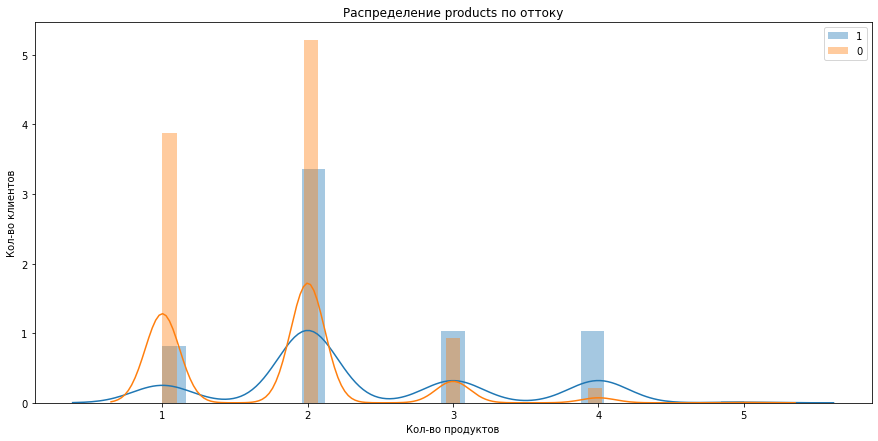

In [118]:
plt.figure(figsize = (15,7))
sns.distplot(data_m_churn1['products'],label='1')
sns.distplot(data_m_churn0['products'],label='0')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение products по оттоку')
plt.legend()
plt.show()

3. Кол-во групп? - 2 (ушидшие и оставшиеся).

4. Связанность групп? - связанности, как таковой нет. Это все разные люди! Единственное, что их может объединять - банк которым они пользовались.

### Проверим распределение на нормальность оставшихся клиентов

In [119]:
data_m_churn0['products'].describe()

count    8116.000000
mean        1.758995
std         0.712929
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64

In [120]:
data_m_churn0['products'].mean() # среднее кол-во продуктов у оставшихся клиентов равно = 1.75

1.7589945786101528

In [121]:
data_m_churn0['products'].std() # стандартное отклонение по кол-ву продуктов у оставшихся клиентов равно = 0.71

0.7129290459036538

In [122]:
mu = data_m_churn0['products'].mean()
sigma = data_m_churn0['products'].std()

distr = st.norm(mu, sigma) 

x1 = 1.04 # возьмем 2 случайные величины в рамках стандартного отклонения по доходу ушедших клиентов
x2 = 2.46

result = distr.cdf(x2) - distr.cdf(x1)

print('Вероятность нормального распределения по столбцу кол-ва продуктов у оставшихся клиентов', f'{result:.2f}')

Вероятность нормального распределения по столбцу кол-ва продуктов у оставшихся клиентов 0.68


### Вероятность нормального распределения 68% 

### Проделаем тоже самое для ушедших клиентов

In [123]:
data_m_churn1['products'].describe() # обзор величин по столбцу

count    1807.000000
mean        2.377975
std         0.922478
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: products, dtype: float64

In [124]:
data_m_churn1['products'].mean() # среднее кол-во продуктов у ушедших клиентов равно = 2.37

2.3779745434421695

In [125]:
data_m_churn1['products'].std() # стандартное отклонение по кол-ву продуктов у ушедших клиентов равно = 0.92

0.9224778211263936

In [126]:
mu = data_m_churn1['products'].mean()
sigma = data_m_churn1['products'].std()

distr = st.norm(mu, sigma) 

x1 = 1.45 # возьмем 2 случайные величины в рамках стандартного отклонения по доходу ушедших клиентов
x2 = 3.29

result = distr.cdf(x2) - distr.cdf(x1)

print('Вероятность нормального распределения по столбцу кол-ва продуктов у ушедших клиентов', f'{result:.2f}')

Вероятность нормального распределения по столбцу кол-ва продуктов у ушедших клиентов 0.68


### Вероятность нормального распределения 68% 

## Проверяю дисперсию наборов данных, чтоб выбрать тест для анализа: 

In [127]:
np.var(data_m_churn1['products'])

0.8504944033364684

In [128]:
np.var(data_m_churn0['products'])

0.508205199083472

Метод: 
   * для стобца `est_salary` - колич. данных, с нормальным распределением и 2мя независимыми группами и разными дисперсиями - ему подходит: Т-критерий Стьюдента для независимых выборок с поправкой Уэлча.

### Дисперсии оказались разными, поэтому для двух независимых выборок я выбрал t-критерий Уэлча

In [129]:
sample_3 = data_m_churn0['products']
sample_4 = data_m_churn1['products']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind (sample_3, sample_4, equal_var = False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.762649831270248e-138
Отвергаем нулевую гипотезу


<b>Различия однозначны. Тест показал отрицательную вероятность.</b>

[Наверх к содержанию](#содержание)

# Шаг 4.3 Подведение промежуточных итогов. <a class="anchor" id="stata3"></a>

<b>По итогам статистических проверок, можно утверждать что, доходы у уходящих клиентов не отличаются. Вероятность совпадения выброк равна = 86,16%. А вот, по количеству продуктов - различия однозначны! Они наглядно показаны на графике.</b>

[Наверх к содержанию](#содержание)

# Шаг 5. Выводы и рекомендации. <a class="anchor" id="results"></a>

## Выводы:

По итогу исследования, можно отметить:
 * что доходы уходящих и оставшихся клиентов сильного статистического различия не имеют;
 * разница кредитного рейтинга незначительная, но чуть выше у уходящих (медианы 867 и 848);
 * разница по кол-ву продуктов статистически подтверждена.
 
 Портрет клиентов, склонных к оттоку:
 * гендерный состав 65% мужчин, 35% женщин;
 * с кредитным рейтингом от 820 до 940 баллов;
 * с балансом от 390 тыс - 1348 тыс рублей (преобладают в оттоке клиенты с 1 млн 200 тыс и более на счету);
 * медианный возраст 39 лет;
 * группы по возрасту - 25-35 лет, 50-60 лет;
 * кол-во продуктов от 2х;
 * баллов в собственности от 3 до 5;
 * у 55% есть кредитная карта;
 * преимущественно активные клиенты.

## Рекомендации:

У большинства ушедший клиентов были деньги на счету (в среднем от 390 тыс - 1348 тыс рублей, это по Q1 и Q3), необходимо сравнить предложения других банков по депозитам и предлагать потенциально отточным клиентам более выгодные депозиты! Особенно возрастной категории 50-60 лет.

Для клиентов из младшей возрастной категории 25-35 лет, сформировать конкурентные предложения по cashback и проценту на остаток. Провести опрос, и узнать что клиентам не нравится в мобильном приложении, а что лучше исправить! Также узнать, о планах на ипотеку и интерес к инвестиционным продуктам. Если интерес есть, предложить обучение (бесплатное и платное), а для опытных пользователей конкурентные условия по продуктам. 

Также, стимулировать активное использование продуктов периодическими акциями подготовленными для разных групп клиетов! 

[Наверх к содержанию](#содержание)